# Probability
Author: Vo, Huynh Quang Nguyen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Acknowledgements:
The contents of this note are based on the lecture notes and the materials from the sources listed below:

1. _Essential Math for Data Science_ in 6 Weeks webinar given by Dr Thomas Nield.
Available in O'Reilly Learning: [Essential Math for Data Science in 6 Weeks](https://learning.oreilly.com/attend/essential-math-for-data-science-in-6-weeks/0636920055929/0636920055928/)


2. _Probability Cheatsheet v2.0_ given by William Chen, and Joe Blitzstein, with contributions from Sebastian Chiu, Yuan Jiang, Yuqi Hou, and Jessy Hwang.
Available in Github: [http://github.com/wzchen/probability_cheatsheet]


3. _Deep Learning_ textbook by Dr Ian Goodfellow, Prof. Yoshua Bengio, and Prof. Aaron Courville. The book is available for public access via a designated website: [Deep Learning textbook](https://www.deeplearningbook.org/)


4. _Introduction to Probability and Statistics for Engineers and Scientists_ textbook by Prof. Sheldon Ross from University of Southern California.


5. _Mathematics for Machine Learning_ textbook by Prof. Marc Peter Deisenroth, Prof. A. Aldo Faisal, and Prof. Cheng Soon Ong. 

The book is freely available in Github:  [Mathematics for Machine Learning textbook](https://mml-book.github.io/)  


# Table of Contents
1. [Mathematical Notation](#Section1)
1. [Introduction to Probability](#Section2)
2. [Overview of Probability](#Section3)
3. [Bayes' theorem](#Section4)
4. [Random Variables](#Section5)
6. [Appendix](#Section6)
7. [Suggestive Readings](#Section7)

# I. Mathematical Notation <a name = "Section1"></a>
Because of the discrepancy in the usage of mathematical notation for probability, I tried to consolidate all important notations as follows: 

|                                                                                	|                                                	|
|:--------------------------------------------------------------------------------	|:------------------------------------------------	|
| Sample space                                                                   	| $\Omega$                                       	|
| Event space                                                                    	| $\mathcal{A}$                                  	|
| Outcome                                                                        	| $x$                                            	|
| Probability of an outcome associated to an event $X$                           	| $P(X = x_i)$                                   	|
| Probability of an event $A$ to occur                                           	| $P(A)$                                         	|
| Probability of an event $A$ not to occur                                       	| $P(\bar{A})$                                   	|
| Probability space                                                              	| $(\Omega;\mathcal{A}; P(x))$                   	|
| Target space                                                                   	| $\mathcal{T}$                                  	|
| Mapping an outcome to a quantity of interest                                   	| $X: \Omega  \rightarrow \mathcal{T}$           	|
| Odds ratio                                                                     	| $O(x)$                                         	|
| Outcomes of an event $X$                                                       	| $x_i \in \{x_1,x_2,...,x_n\}$                  	|
| Joint probability of two events $X$ and $Y$                                    	| $P(X = x_i,Y = yi)$                            	|
| Union probability of two events $X$ and $Y$                                    	| $P(X = x_i \cup Y = y_i)$                      	|
| Conditional probability between two events $X$ and $Y$                         	| $P(X = x_i\|Y = y_i)$                          	|
| A random variable $\mathbf{X}$ has $n$ outcomes                                	| $\mathbf{X} = \{x_1,x_2,...,x_n\}$               	|
| A set of random variables                                                      	| $[\mathbf{X_1},\mathbf{X_2},...]$              	|
| A matrix containing all possible states of a vector of random variables        	| $\mathbb{x}$                                   	|
| Probability distribution of a discrete random variable $\mathbf{X}$            	| $P(\mathbf{X})$                                	|
| Probability of a state associated with a discrete random variable $\mathbf{X}$ 	| $p(x_i) \in P(\mathbf{X})$             	|
| Probability mass function of a discrete random variable $\mathbf{X}$           	| $P_{\mathbf{X}}(x), x \in \{x_1,...,x_n\}$     	|
| Probability density function of a continuous random variable $\mathbf{X}$      	| $p_{\mathbf{X}}(x) = f_{\mathbf{X}}(x)$        	|
| Cumulative density function of a continuous random variable $\mathbf{X}$       	| $p_{\mathbf{X}}(X \leq x) = F_{\mathbf{X}}(x)$ 	|
| Probability mass function of a binomial distribution                           	| $P_{\text{binom}}(\mathbf{X} = x)$              	|
| Probability density function of a Gaussian distribution with $\mu,\sigma$      	| $f(x;\mu;\sigma)$                               	|
| Probability density function of a Gamma distribution with $\alpha,\lambda$           	| $f(x;\alpha;\lambda)$                          	|
| Probability density function of a chi-square distribution with $n$ degree of freedom 	| $f(\mathbf{Z_i};n)$                            	|
| Probability density function of a t-distribution with $n$ degree of freedom          	| $f(\mathbf{T_n};n)$                            	|
| Expected value of a random variable $\mathbf{X}$                                     	| $E[\mathbf{X}]$                                	|
| Variance of a random variable $\mathbf{X}$                                           	| $\text{Var}(\mathbf{X})$                     	|
| Covariance of a two random variables $\mathbf{X}$ and $\mathbf{Y}$                   	| $\text{Cov}[\mathbf{X},\mathbf{Y}]$            	|

# II. Introduction to Probability <a name = "Section2"></a>
## 1. Why do we care about probability?
1. Machine learning must always deal with uncertain quantities, and sometimes may also need to deal with stochastic (non-deterministic) quantities which come from many sources. There are three main sources:
     * **Inherent stochasticity** in the system being modeled. For example, the dynamics of subatomic particles in quantum mechanics systems are probabilistic, or a hypothetical card game where we assume that the cards are truly shuﬄed into a random order.
     * **Incomplete observability**. Even deterministic systems can appear stochastic when we cannot observe all of the variables that drive the behavior of the system. For example, in the Monty Hall problem, the outcome given the contestant’s choice is deterministic but uncertain from the contestant's point of view.
     * **Incomplete modeling**. For example, when we use a model that must discard some of the information we have observed, the discarded information results in uncertainty in the model’s predictions.


2. Noted that the term _stochasticity_ refers to randomnes. Meanwhile, the term _determinism_ refers to a type of system in which the outputs are always the same given starting conditions or initial state.

<div>
    <img src = "images/monty_hall.png" width = 80%/>
    </div>

Figure 1: Visualization of the famous Monty Hall problem and its decision flowchart (adapted from **Brilliant Math & Science Wiki**). Monty Hall problem is a thought-experiment where you are asked to open three doors. Behind each door, there is either a car or a goat. You choose a door. The host, Monty Hall, picks one of the other doors, which he knows has a goat behind it, and opens it, showing you the goat. Monty then asks whether you would like to switch your choice of door to the other remaining door. Assuming you prefer having a car more than having a goat, and according to the game rules the host will always reveal a goat, do you choose to switch or not to switch the door of your choosing? This thought experiment is a prime example of incomplete observability: the outcome is always deterministic (getting either a car or a goat), but you -as a contestant, do not know what outcome you will get.


## 2. Applications of probability
Together with linear algebra, statistics and multivariate calculus, probability plays a crucial role in machine learning. Below are several examples of its application in machine learning.

#### Naive Bayes algorithm
<div>
    <img src="images/naive_bayes.png" />
    </div>
    
Figure 2: Illustration behind the Naive Bayes algorithm. In this algorithm, we estimate the probability distribution of our data ($P(x_{\alpha}|y)$) independently in each dimension, and then obtain an estimate of the full data distribution by assuming conditional independence $P(x|y)=\prod_{\alpha} P(x_{\alpha}|y)$. This algorithm is widely used in some applications such as spam mail filtering.



## 3. Probability vs. statistics
1. Probability and statistics often get confused and said interchangeably, but there is a distinction:
    * Probability is solely about studying likelihood.
    * Statistics utilizes data to discover likelihood.


2. In practicality, these two things are going to be tightly tied together, as one can argue it is hard to have probability without data.


# III. Overview of Probability <a name = "Section3"></a>
## 1. What is probability?
1. We can simply understand probability as to how likely an event will happen, based on observations or beliefs. Some examples of probability are:
    * How likely is it we will get 7 heads in 10 fair coin flips?
    * What is the likelihood our flight will be late?
    * How certain are we that a product is defective?
    
    
2. Probability is expressed in two ways:
    * As a percentage: 60% chance our flight will be late 
    * As a ratio: 3:2 odds our flight will be late
    
    
## 2. Probability philosophies
There are two philosophies of probability:
1. **Frequentist probability**, which is the most popularly understood approach to probability, believes that the frequency of an event provides hard evidence of the probability ~ related directly to the rates at which events occur.
    * This implies if we repeated an event infinitely many times, then a proportion $p$ of the repetitions would result in that outcome. Therefore, if we gather more data, we will increase confidence in the probability. 
    * Frequentist probability tends to work best when a lot of data is available, reliable, and complete.
    * Commonly used tools include p-values, confidence intervals, prediction intervals, tolerance intervals, etc.
    * Noted that when we are referring to probability as frequentist, we usually use the term chance or likelihood.
    
    
2. **Bayesian probability**, which is much more abstract, is when we assign subjective beliefs in a probability and not just data ~ related to the degree of belief.
    * This implies an arbitrary probability can be assigned based on subjective beliefs, and then data can be used to gradually update that belief.
    * Bayesian methods tend to work well when data is limited, a large amount of domain knowledge is present, or uncertainty is hard to eliminate. 
    * Bayesian tools include the Bayes factor and credible intervals. 

<div>
    <img src = 'images/bayes_example.png' width = 35%>
    </div>

Figure 1: An example of Bayesian probability: suppose we are flipping a coin, and we know that a coin has a 50% chance of landing a **head**. We flip a coin 10 times and get 7 heads simultaneously. As a result, we update the beta distribution of the **head** to the right because we now believe the probability of getting a **head** becomes more probable. Thus, there are greater likelihoods of heads being more than 50%. 


## 3. Fundamentals of probability

### a) Sample space and event space
1. In probabilistic computation, we always couple the probability with sample space and event space, so what are they?


2. The sample space is the set of all possible outcomes of an experiment or an event. We usually denote the sample space as $\Omega$. For example, two successive coin tosses have a sample space of $\{HH, HT, TH, TT\}$, where “H” denotes **head** and “T” denotes **tail**.


3. The event space $\mathcal{A}$ is the space of potential results of an experiment or an event. The event space $\mathcal{A}$ is obtained by considering the collection of subsets of $\Omega$.


4. Many times we confuse the sample space $\Omega$ with the event space $\mathcal{A}$. As a detailed clarification, let's consider an example of coin-flipping. We know that there are only two possible outcomes (either **head** or **tail**); therefore, the sample space is $\Omega = \{H, T\}$. On the other hand, the event space is different because there are three possible events: 
    * Flipping a coin and only getting **heads**: {H};
    * Flipping a coin and only getting **tails**: {T};
    * Flipping a coin and getting either **heads** or **tails**: {H, T}.
    
Therefore, our event space is $\mathcal{A} = \{H,T, \{H,T\}\}$. Noted that each event is jus a subset of the sample space $\Omega$. 


### b) Basics of probability
1. As mentioned above, we understand that probability is a measure of how likely an outcome $x$ is. Probability is typically represented as a number $P(x)$ between 0.0 and 1.0, or as a percentage between 0% and 100%.


2. The probability of an event $P(x)$ not occurring can be calculated by $1.0 − P(x)$, which indicates both outcomes must add to 1.0. This is the basis of the complement rule.
$$
P(x) + P(\bar{x}) = 1
$$


3. When we work with a single simple probability, it is known as a marginal probability.


4. As mentioned above, we know that probability can be based on data, a belief, or both.
    * Based on data: as an example, if we sample 10 products from a factory line and find 4 items are defective, that would be a 40% defective rate $\rightarrow P_{\text{sample}}(\text{defective}) = 0.4$.
    * Based on belief: as an example, an engineer realizes an inferior material was used and guesses the defective rate for the product will be 50% $\rightarrow P_{\text{belief}}(\text{defective}) = 0.5$. 
    * Based on data + belief: we can quantify the engineer’s belief and the data by merging them, and find a 44.44% probability is most likely $\rightarrow P_{\text{total}}(\text{defective}) = 0.4444$.
    

5. By coupling the probability with the sample space $\Omega$ and the event space $\mathcal{A}$, we get the probability space $(\Omega;\mathcal{A}; P(x))$. Given a probability space $(\Omega; \mathcal{A}; P(x))$, we want to use it to model some real-world phenomenon. 


6. In machine learning, we often avoid explicitly referring to the probability space $(\Omega; \mathcal{A}; P(x))$, but instead refer to probabilities on quantities of interest $\mathcal{T}$. We usually define $\mathcal{T}$ as the target space and refer to elements of $\mathcal{T}$ as states. Additionally, we introduce a target space function $X: \Omega  \rightarrow \mathcal{T}$ that takes an element of $\Omega$ (an outcome) and returns a particular quantity of interest $x$ that belongs to the target space $\mathcal{T}$.


#### Expressing probability as odds
1. We know that probability can be expressed as an odds ratio which means how many times we believe in something being true versus not being true. Odds ratios are also a helpful way to quantify subjective beliefs through “betting.”


2. Consider this example, if a friend of us is willing to pay us 200$\text{EUR}$ if the Vietnamese football team can be qualified for the World Cup 2022, but we must pay him 50$\text{EUR}$ if they do not, that means he believes the Vietnamese football team are 4x more likely to fail rather than succeed $\frac{200}{50} = 4.0$. In another case, if he pays 200$\text{EUR}$ for them succeeding but I must pay him 1$\text{EUR}$ if they don't, that means he certainly believes the Vietnamese team are going to fail: 200x more likely ($\frac{200}{1}=200$). 


#### Turning Odds into Probabilities
1. We can turn an odds ratio $O(x)$ of an outcome $x$ into its corresponding probability $P(x)$ by using the following formula:
$$
P(x) = \frac{O(x)}{1 + O(x)}
$$

2. Let's consider the previous example, we can quantify our friend's belief as:
$$
P_1(\text{qualified}) = \frac{200}{200 + 5} \approx 0.976 
$$

$$
P_2(\text{qualified}) = \frac{200}{200 + 1} \approx 0.995
$$


### c) Probabilistic computation

#### Joint probabilities
1. Suppose we have two events $X$ and $Y$, each event has an $n$ number of outcomes $x_i \in \{x_1,x_2,...,x_n\}$ and $y_i \in \{y_1,y_2,...,y_n\}$, respectively. Assuming that both events occur independently meaning they do not affect the outcome of each other, the probability of both events occurring simultaneously is:
$$
P(X\cap Y) = P(X,Y) = P(X) \times P(Y)
$$


2. The generalized form of the above formula taking into account the outcomes of both events is:
$$
P(X = x_i,Y = yi) = P(X = x_i) \times P(Y = y_i)
$$



3. As an example, let's the probability of flipping a coin (Event $X$) and getting a **head** ($X = \text{head}$) , and of rolling of a die (Event $Y$) and getting a **six** ($Y = 6$).  Since both events are independent, the probability of both events occurring with the aforementioned outcomes simultaneously is:
$$
P(X = \text{head},Y = 6) = \frac{1}{2} \times \frac{1}{6} = \frac{1}{12}
$$
given that $x_i \in \{\text{head},\text{tail}\}$ and $y_i \in \{1,2,3,4,5,6\}$.



4. Joint probabilities work on the so-called product rule, and we can use this to combine as many probabilities as we want. As an example, we have an $n$ number of events $\mathbf{X} = [X_1,X_2,...,X_n]$, each event is independent to each other, and each event of a set of possible outcomes. Thus, the probability of all events occurring with specific outcomes is:
$$
P(X_1 = \text{outcome}_{X_1},X_2 = \text{outcome}_{X_2},...) = \prod_i^n P(X_i = \text{outcome}_{X_i})
$$

#### Union probabilites
1. There are two kinds of union probabilities: mutually exclusive (m.e) and non-mutually exclusive (n.m.e).


2. When two events are mutually exclusive, meaning that only one of the events can occur but not both, then the resulting probability is the sum of an individual event's probability. For example, we want to compute the probability of getting a **four** or **six** on a die roll: because we cannot get **four** and a **six** simultaneously, we just add these probabilities together.
$$
P(X = 4 \cup X = 6) = P(X = 4 \cup X = 6) =  \frac{1}{6}\times \frac{1}{6} = \frac{1}{3}
$$


3. When two events are non-mutually exclusive, meaning that two events can occur simultaneously, then the resulting probability follows the so-called sum rule. For example, we want to compute the probability of getting a prime $x_i \in {1,2,3,5}$ or an even number $x_i \in {2,4,6}$ on a die roll.
$$
P(X = \text{prime}\cup X = \text{even}) = P(X = \text{prime}) + P(X = \text{even}) - P(X = \text{prime}\cup X = \text{even}) = \frac{4}{6} + \frac{3}{6} - \frac{1}{6} = 1
$$


4. Noted that the sum rule is applicable for all union probabilities: in non-mutually exclusive events, the joint probability is zero. Similar to the product rule, we can apply the sum rule for as many probabilities as we like.
<div>
    <img src ="images/union_probabilities.png"/>
    </div>
    
Figure 2: An example of union probability: suppose we have a deck of cards, the mutually exclusive (m.e) events are Aces and Kings because they cannot occur simultaneously (a). Meanwhile, the non-mutually exclusive (n.m.e) events are Hearts and Kings because they can occur simultaneously (b). If we want to compute the n.m.e, we must deduct the joint probability to avoid counting the latter repeatedly.


#### Conditional probability
1. Conditional probability describes the probability an outcome of Event $X$ occurs given an outcome of Event $B$ occurs:
$$
P(X = x_i|Y = y_i) = P(X = x_i \text{ given } Y = y_i) = P(X = x_i \text{ if } Y = y_i) 
$$


2. The conditional probability has the following characteristics:
    * If Event $X$ has no impact on whether Event $Y$ occurs, then $P(Y =  y_i) = P(Y = y_i|X = x_i)$.
    * If Event $X$ does impact Event $Y$ by increasing or decreasing the latter's probability, then $P(Y =  y_i) \neq P(Y = y_i|X = x_i)$.


3. The conditional probability is computed as follows:
$$
P(X = x_i|Y = y_i) = \frac{P(X = x_i,Y = y_i)}{P(Y = y_i)}
$$


# IV. Bayes' Theorem <a name = "Section4"></a> 
## 1. Overview of Bayes' theorem
### a) What is Bayes' theorem?
1. As an example, let's consider the likelihood of being colourblind in humans, we know that the chance of someone being colourblind is 4.25%, and the probability of a male being colourblind is 8%. Does it mean:
    * Any colourblind person is 8% likely to be male? Or,
    * Any male is 8% likely to be colourblind?
    
    
2. We can reframe our questions to become:
    * What is the likelihood of any colourblind person being male?
    * What is the likelihood of any male being colourblind?
    
    
3. These questions can be easily answered using the famous Bayes' theorem:
$$
P(Y = y_i|X = x_i) = \frac{P(Y = y_i)P(X = x_i|Y - y_i)}{P(X = x_i)}
$$

***
* We compute the following probabilities:
    * Likelihood of being colourblind: $P(\text{blind}) = 4.25\% = 0.0425$
    * Likelihood of a male being colourblind: $P(\text{blind}|\text{male}) = 8\% = 0.08$

* Likelihood of being a male: $P(\text{male}) = 50\% = 0.5$

* Likelihood of a colourblind being male: 
$$
P(\text{male}|\text{colourblind}) = \frac{P(\text{male})\times P(\text{blind}|\text{male})}{P(\text{blind})} = \frac{0.08 \times 0.5}{0.0425} = 0.9411
$$

***
![SegmentLocal](images/bayes_theorem.gif)

Figure 1: Visualization of the Bayes' theorem: suppose there is a person called Steve with a specific description of his personality (we refer here as **evidence**), and we try to figure what his job is given that there are two possibilities: either he is a librarian or a farmer. We have a **hypothesis** that he is a librarian, so we want to gather all possible information to determine the likelihood of our hypothesis (the higher the likelihood, the more probable it is). To compute such likelihood, we can employ the Bayes' theorem (adapted from **Bayes' theorem** video from _3Blue1Brown_ Youtube channel).


### b) Why studying Bayes' theorem 
#### Bayesian probability as a fool-proof mathematical thinking
1. Suppose a study that has been released that claims 85% of homicidal criminals in the United States have played violent video games. What does this mean? Should we be alarmed and blame the video game industry? The answer is a clear "no", and we will discover the reason why.

***
* We know that 85% of homicidal criminals are gamers; thus, we can express the probability of a homicidal criminal being a gamer to be $P(\text{gamer}|\text{homicidal}) = 0.85$. To find the probability of a gamer being a criminal, we have to apply the Bayes' theorem:
$$
P(\text{homicidal}|\text{criminal}) = \frac{P(\text{gamer}|\text{homicidal})P(\text{homicidal})}{P(\text{gamer})}
$$
So far, we only have the information of $P(\text{gamer}|\text{homicidal})$. We now need to find $P(\text{gamer})$ and $P(\text{homicidal})$.


* According to the FBI, there are 17,251 known homicidal offenders in 2017 and according to Wolfram Alpha, there are 324 million people in the United States in the same year. Thus, the probability of any random person in the United States to be a homicidal criminal is:
$$
P(\text{homicidal}) = \frac{17251}{324000000} \approx 5.324\times10^{-5} 
$$


* Next, gathering data from video game industry market research, we can estimate that 19% of the population plays violent video games: $P(\text{gamer}) = 0.19$.


* Applying the Bayes' theorem, we figure out that:
$$
P(\text{homicidal}|\text{gamer}) = \frac{0.85\times5.324\times10^{-5}}{0.19} \approx 2.381\times10^{-4} = 0.02381%
$$


* According to the Bayes' theorem, a person who plays violent video games is only 0.02381% likely to be violent. This number is much less significant than the 85% statistic, and shows how subtle but drastic the difference is between “What is the probability of A given B?” versus “What is the probability of B given A?”

***

#### Bayes' theorem as a means to update knowledge
1. Suppose a medical technology vendor approaches our organization and says they have an AI system that takes a small blood sample then predicts a health risk (simply categorized as “AT RISK” or “NOT AT RISK”) ~ yes, that vendor is Theranos. The vendor says that 99% of patients who are at risk will test positive. So, we need to answer the following questions:
    * Is this claim significant and credible? Why or why not? 
    * What should our next questions be to the vendor?
    
    
2. Let's analyze what we know so far from the vendor: we are told that for patients that have health risks, 99% will be identified successfully (sensitivity). But what if we flip the question? What percentage of those who tested positive have the health risk (precision)? The vendor goes back to their research team and returns with a confusion matrix of 1000 patients they tested. According to this matrix, the answer for our question is $\frac{198}{198+50} = 0.798 = 79.8%$.

|             	| TEST POSITIVE 	| TEST NEGATIVE 	|
|-------------	|---------------	|---------------	|
| AT RISK     	|      198      	|       2       	|
| NOT AT RISK 	|       50      	|      750      	|


3. With this confusion matrix, we indeed see 99% of those who are at risk test positive, and that 79.8% of those who tested positive are at risk. We found conditional probability in both directions. Despite these numbers, we start to feel uncomfortable that we are not using outside data beyond the vendor’s test. What else can we do to verify the vendor’s claims and testing results?


4. After doing a bit of study using Wikipedia, we discover something pivotal: only 1% of the population is at risk. This means if we planned on deploying this test to 100000 patients, only 1000 are likely at risk. The vendor advertised a 99% true positive rate. We now wonder: will the vendor’s product be capable of singling out these 1000 patients out of 100000 without error?


5. Let's recap what we have known so far:
    * The probability of any person being at risk is 1% $\rightarrow P(at risk) = 0.01$. We refer to this as prior ~ what we believe before seeing the evidence.  
    * The probability of any person tested positive according to the information provided to us by the vendor is $P(\text{positive}) = \frac{198 + 50}{198 + 50 + 2 + 750} = 0.248$. We denote this as knowledge ~ the probability of that evidence occur under any circumstances.
    * The probability of people tested positive if being at risk is 99% $\rightarrow P(\text{positive}|\text{at risk}) = 0.99$. We denote this as likelihood ~ the likelihood of seeing that evidence if our hypothesis is correct. 


6. Using Bayes' theorem, we can incorporate this 1% statistic to find the true probability of being at risk if tested positive.
$$
P(\text{at risk}|\text{positive}) = \frac{P(\text{at risk})P(\text{positive}|\text{at risk})}{P(\text{positive})} = \frac{0.99\times0.01}{0.248} \approx 0.0399 = 3.99%
$$
It is clear that the updated precision, which is again the probability of those who tested positive have the health risk, significantly reduce from 79.8% to 3.99%!


7. Because the new precision is so marginal, it is not beneficial to employ this AI system from our vendor. 


### c) Normalizing constant and chaining conditional probabilities
1. A helpful tool in conditional probabilities is the normalizing constant, which can give us the information we may be missing to use in Bayesian problems. Considering two events Event $A$ and Event $B$ where Event $B$ may conditionally affect Event $A$, the total probability of Event $A$ should be:
$$
P(A) = P(A|B)P(B) + P(A|\bar{B})P(\bar{B})
$$
So, what does it mean exactly? To compute the total probability of Event $A$, we need to consider whether the true and false cases of Event $B$ occurring add up to the total probability of the former event. As a result, the probabilities $P(B)$ and $P(\bar{B})$ are referred as the normalizing constants.


2. One of the cool things about Bayes' theorem is that we can keep chaining several conditional probabilities together that affect an event of interest, assuming each condition is independent of the other conditions. As an example, suppose we have an Event $A$, and we want to calculate the probability it will occur given Event $B$ and Event $C$ has occurred. Using Bayes' theorem, the necessary conditional probabilities are:
$$
P(A|B\cap C) = \frac{P(B|A)P(C|A)P(A)}{P(B|A)P(C|A)P(A) + P(B|\bar{A}) + P(C|\bar{A}) + P(\bar{A})}
$$


# V. Random Variables <a name = "Section5"></a>
## 1. What is a random variable?
1. In probabilistic modelling and computation, a random variable $\mathbf{X}$ is a variable that can take on different values randomly. To simply put, we can understand a random variable as a variable whose possible values are numerical outcomes of a phenomenon.


2. A random variable has the following properties:
    * A random variable can be a vector-valued variable: $\mathbf{X} = {x_1, x_2, ..., x_n}$. When writing in this way, we mean this random variable $X$ has $n$ outcomes ${x_1, x_2, ..., x_n}$.
    * On its own, a random variable is a description of the states that are possible of a phenomenon. Therefore, it must be coupled with a probability distribution that specifies how likely each of these states is.
    * Random variables may be discrete or continuous. 
    
    
3. Recall the mapping of the sample space into the target space $\mathbf{X}: \Omega \rightarrow \mathcal{T}$ in machine learning, this association/mapping is also referred to as a random variable. 
    
    
### a) Discrete random variable:
1. A discrete random variable may take on only a countable number of distinct values such as 0,1,2,3,4,... Discrete random variables are usually (but not necessarily) countable. If a random variable can take only a finite number of distinct values, then it must be discrete.


2. Examples of discrete random variables include the number of children in a family or the number of defective chips in a lot.


### b) Continuous random variable:
1. A continuous random variable takes an infinite number of possible values. Continuous random variables are usually measurements. 


2. Examples include height, weight, the amount of sugar in orange, or the time required to run a mile.


## 2. Probability Distribution
### a) What is a probability distribution?
1. A probability distribution is a description of how likely a random variable $\mathbf{X}$ or a set of random variables $[\mathbf{X_1},\mathbf{X_2},...]$ is to take on each of its possible states. 


2. We describes probability distribution based on the types of our random variable:
    * If the random variable $\mathbf{X}$ is discrete, we will use a probability mass function $P_{\mathbf{X}}(x)$, given $x$ here is an outcome or state of the random variable $\mathbf{X}$.
    * If the random variable $\mathbf{X}$ is continuous, we will use a probability density function $p_{\mathbf{X}}(x)$.
    

3. We usually use the phrase univariate distribution to referring to distributions of a single random variable, whose states are denoted as $x$ mentioned above. On the other hand, we usually refer to distributions of more than one random variable as multivariate distributions, and will usually consider a vector of random variables, whose states are usually expressed by a matrix $\mathbb{x}$).


### b) Probability distribution of a discrete random variable
1. The probability distribution of a discrete random variable is a list of probabilities associated with each of its possible values.


2. Considering a random variable $\mathbf{X}$ may take $n$ different states, with the probability of each state $\mathbf{X} = x_i$ defined to be $p(x_i)$, and each probability is drawn from the probability distribution $P(\mathbf{X})$. We usually refer these 'smaller' probabilities drawn from the distribution as marginal probabilities. These marginal probabilities $p(x_i)$ must satisfy the following conditions:
    * Each probability $p(x_i)$ must lie within the range $0 < p(x_i) < 1$ for each possible state $x_i$. Technically speaking, the range should be $0 \leq p(x_i) \leq 1$; however, if the number of possible states is more than 2, the condition $0 < p(x_i) < 1$ is more plausible.
    * The sum of all marginal probabilities is one: $p(x_1) + p(x_2) + ... + p(x_n) = \sum_i^n p(x_i) =  1$.
 
 
3. As an example, suppose a variable $X$ can take the values of 1, 2, 3, or 4. The probabilities with each outcome are described as follows:

| Outcome     	| 1   	| 2   	| 3   	| 4   	|
|-------------	|-----	|-----	|-----	|-----	|
| Probability 	| 0.1 	| 0.2 	| 0.3 	| 0.4 	|

We can visualize this probability with a histogram.


4. As mentioned above, we know that a probability mass function (abbreviated as p.m.f) $P_{\mathbf{X}}(x)$ is used to describe the probability distribution of a discrete random variable $\mathbf{X}$, so what is it exactly? We can simply understand it as a function that maps the probability that our random variable is exactly equal to some value. For example, considering the rolling of a die, we can visualize the probability of each possible value as follows:

<div>
    <img src= "images/fair_dice_probability_distribution.png" width = 35%/>
    </div>

Figure 1: Visualization of a probability mass function (p.m.f) that describes the probability distribution of rolling of a die. All the numbers on the die have an equal chance of appearing on top when the die stops rolling. We usually refer this type of distribution to be an uniform distribution.

6. According to the visualization, we can derive the following p.m.f to express the same information:
$$
p_{\mathbf{X}}(x) = \begin{cases} \frac{1}{6}, x \in \{1,2,3,4,5,6\} \\ 0, \text{ otherwise}
\end{cases}
$$

### c) Probability distribution of a continuous random variable
1. For a continuous random variable $\mathbf{X}$, it is more natural to define the former's probability is in an interval $p(a\leq\mathbf{X}\leq b)$ given $a\leq b$, and the probability is represented by the area under a curve -in other words, an integral. The curve, which represents by a function $p_X(x)$, must satisfy the following conditions:
    * The curve has no negative values: $p_{\mathbf{X}}(x) > 0,  \forall x$.
    * The total area under the curve is equal to one: $\text{AUC} = \int_{x \in \mathbb{R}} p_X(x)dx = 1$.


3. The curve that satisfies the above conditions is called the density curve. Because the probability of a continuous random variable is described as the area under the density curve, it is why we refer the distribution of continuous random variable as the probability density function (p.d.f). Noted that sometimes we denote the p.d.f as $f_{\mathbf{X}}(x)$.  


4. As an example, suppose we are studying the distribution of intelligence quotient (IQ) of a designated population. When we plot the population distribution as a function of IQ, we will get the famous bell-shaped curve. Using this curve, we can compute the probability that we encounter a random person having an IQ score within the range [70,130] to be 95.47%.
<div> 
    <img src = 'images/iq.jpg' width = 80%/>
    </div>

Figure 2: Visualization of the probability density function describing the distribution of IQ scores in the general population (adapted from the **Wechsler intelligence score**).


5. In some cases, we want to find the probability of our continuous random variable $\mathbf{X}$ takes on values that are lesser than a designed value $x$. To do so, we compute the area under the curve of $p_{\mathbf{X}}(X \leq x)$, and we define the latter expression as the cumulative distribution function (c.d.f). Noted that sometimes we denote c.d.f as $F_{\mathbf{X}}(x)$.


6. So why do we care about the c.d.f? As an example, we have a dataset called $\mathbf{X}$, and we want to determine what kind of the probability distribution that best describes the one of our dataset. To do so, we can compute the c.d.f of our given dataset, then compare to the c.d.f of a reference distribution we selected $\rightarrow$ if the difference is low, this means our selected reference distribution is the best fit.

In [2]:
##
# DEMO: COMPUTE THE IQ PROBABILITY
#
import math

def normal_pdf(x: float, mean: float, std_dev: float) -> float:
    return (1.0 / (2.0 * math.pi * std_dev ** 2) ** 0.5) * math.exp(-1.0 * ((x - mean) ** 2 / (2.0 * std_dev ** 2)))

def approximate_integral(a, b, n, f):
    delta_x = (b - a) / (n - 1)
    
    total_sum = 0
    for i in range(1, n + 1):
        midpoint = 0.5 * (2 * a + delta_x * (2 * i - 1))
        total_sum += f(midpoint)
        
    return total_sum * delta_x

p_between_70_and_130 = approximate_integral(a = 70, b = 130, n = 1000, f = lambda x: normal_pdf(x,100,15))
print(p_between_70_and_130)

0.954715196127298


### d) Commonly used probability distribution

#### Binomial distribution (for discrete random variable)
1. Consider a random experiment or a random event or a random variable that only has two possible outcomes (**Yes** or **No**, **Pass** or **Fail**, which generalized as $x$ and $\bar{x}$), we define the binomial distribution as simply the probability of a $x$ or $\bar{x}$ outcome in an experiment or event or variable that is repeated multiple times. 


2. Considering an event $\mathbf{X}$ with a $n$ number of trials, a $p$ probability of an outcome $x$ given $x \in \{0,1\}$, and a $k$ number of times for a specific outcome within $n$ trials, the formula to compute the binomial distribution is:
$$
P_{\text{binom}}(\mathbf{X} = x) = \binom{n}{k}p^k(1-p)^{n-k}
$$


3. As an example, suppose we are investigating the disk manufacturing process for a certain company. We know that the probability of a disk to be defective to be 0.01, and it is independently of each other. The company sells the disks in packages of 10 and offers a money-back guarantee that at most 1 of the 10 disks is defective. We try to answer the questions of:
    * What proportion of packages is returned? And,
    * If someone buys three packages, what is the probability that exactly one of them will be returned?

***
* We denote $\mathbf{X}$ as the number of defective disks in a package. Because $\mathbf{X}$ is a discrete random variable with two possible outcomes (**DEFECTIVE** or **FUNCTIONAL**), we can answer our questions by computing the probability that a package will have to be replaced using binomial distribution.


* To do so, firstly, we have to identify what is our $p$. According to the information about the defect probability, we know that $p = 0.01$.


* Secondly, we have to identify what is our $n$. Because the company sells the disks in packages of 10, our $n$ is 10.


* Thirdly, we have to identify what is our $k$. Because of the company's return policy and assuming that customers always take advantage of the guarantee, our $k$ is then ranging from 1 to 10. 


* Therefore, our probability is as follows:
$$
P(\mathbf{X} \geq 1) = P(\mathbf{X} = 1) + P (\mathbf{X} = 2) + ... + P(\mathbf{X} = 10) = 1 - P(\mathbf{X} = 0) = 1 - \binom{10}{0}(0.01)^0 (1-0.01)^{10} = 0.09561792499119548
$$
***
<div>
    <img src="images/binomial.png"/>
    </div>

Figure 3: Visualization of several probability mass functions describing the binomial distributions of different probabilities $p = {0.3,0.5,0.6}$ for the same number of trials $n = 10$.

#### Bernoulli distribution (for discrete random variable)
1. Considering the binomial distribution $P_{\text{binom}}(\mathbf{X} = x)$ but having only a single trial ($n = 1$), we call this special case of the binomial distribution to be the Bernoulli distribution.


2. We can express the Bernoulli distribution of a discrete random variable $X$ having $x \in \{0,1\}$ possible values with the following p.m.f:
$$
P_{\text{Bernoulli}}(X = x) = \begin{cases} p  & \text{if } x = 1 \\ 1 - p & \text{if } x = 0 \end{cases}
$$

3. An alternative expression of the Bernoulli distribution is:
$$
f(x;p) = p^x(1-p)^{1-x}, \text{for } x \in \{0,1\} 
$$
given that $f(x;p)$ is the p.m.f for $x \in \{0,1\}$ possible values with a $p$ probability.


#### Poisson distribution (for discrete random variable)
1.  Considering a random variable $\mathbf{X}$ taking on possible values $ i \in \{0,1,...,n\}$, we define it to be a Poisson random variable if its p.m.f is given by:
$$
P_{\text{Poisson}}(\mathbf{X} = i) = \text{exp}(-\lambda) \frac{\lambda^i}{i!}, \text{ } i = 0,1,...,n
$$

<div>
    <img src = 'images/poisson.png' width = 35%/>
    </div>
    
Figure 4: The Poisson probability mass function with $\lambda = 4$ (adapted from **Mathematics for Machine Learning** by Deisenroth et al). 

2. The Poisson random variable has a wide range of applications in a variety of areas because it is usually employed as an approximation for a binomial random variable with parameters $(n, p)$ when $n$ is large (typically $n > 1000$) and $p$ is small. Below are selected examples random variables that usually obey, to a good approximation, the Poisson probability law (that is, they usually obey the above formula for some value of $\lambda$):
    * The number of misprints on a page (or a group of pages) of a book;
    * The number of people in a community living to 100 years of age;
    * The number of wrong telephone numbers that are dialled in a day.
    
    
3. Each of the foregoing examples is approximately Poisson for the same reason — namely, because of the Poisson approximation to the binomial. For instance, we can suppose that there is a small probability $p$ that each letter typed on a page will be misprinted, and so the number of misprints on a given page will be approximately Poisson with a mean of $\lambda = np$ where $n$ is the (presumably) a large number of letters on that page. Similarly, we can suppose that each person in a given community, independently, has a small probability $p$ of reaching the age 100, and so the number of people that do will have approximately a Poisson distribution with a mean of $np$ where $n$ is a large number of people in the community.

#### Gaussian distribution (for continuous random variable)
1. Considering a continuous random variable $\mathbf{X}$ whose possible values are denoted as $a \leq x \leq b$, the Gaussian distribution also known as the normal distribution for this variable is expressed with the following p.d.f:
$$
f(x;\mu,\sigma) = \sqrt{\frac{1}{2\pi\sigma^2}}exp(\frac{-(x-\mu)^2}{2\sigma^2})
$$


2. Normal distributions are a sensible choice for many applications. In the absence of prior knowledge about what form a distribution over the real numbers should take, the normal distribution is a good default choice for two major reasons.
    * Many distributions we wish to model are truly close to being normal distributions. As stated by the ever-famous Central Limit theorem, the sum of many independent random variables is approximately normally distributed.
    * Out of all possible probability distributions with the same variance, the normal distribution encodes the maximum amount of uncertainty over the real numbers.
    
<div>
    <img src = "images/gaussian_distribution.PNG" width = 50%/>
    </div>
    
Figure 5:Gaussian distributions overlaid with 100 samples: (a) one-dimensional case, which means we only consider one specific sample; (b) two-dimensional case, which means we consider all 100 samples simultaneously (adapted from **Mathematics for Machine Learning** by Deisenroth et al).


3. We define a standard normal distribution as a normal distribution having $\mu = 0$ and $\sigma = 1$.
<div>
    <img src = "images/standard_normal.png" />
    </div>

Figure 6: Standard normal probabilities (adapted from **Introduction to Probability and Statistics for Engineers and Scientists** by Ross et al).

#### Gamma distribution (for continuous random variable)
1. A random variable $\mathbf{X}$ is said to have a Gamma distribution with parameters $(\alpha,\lambda) \forall (\lambda, \alpha) > 0$ if its p.d.f is given by:
$$
f(x;\alpha;\lambda) = \begin{cases} \frac{\lambda e^{-\lambda x}(\lambda x)^{\alpha -1}}{\Gamma(\alpha)}, x \geq 0\\ 0, x < 0\end{cases}
$$
given that $\Gamma(\alpha) = \int_0^{\infty} \lambda e^{-\lambda x}(\lambda x)^{\alpha -1}dx$ i.e. the area under the curve $\lambda e^{-\lambda x}(\lambda x)^{\alpha -1}$. 

<div>
    <img src = "images/gamma.png" />
    </div>

Figure 6: Visualization of the gamma distribution with $(\alpha,1)$: (a) $\alpha$ = 0.5,2,3,4,5; (b) $\alpha = 50$. It is clearly that the higher the $\alpha$ given $\lambda$ is constant, the Gamma distribution becomes more similar to the Gaussian distribution (adapted from **Introduction to Probability and Statistics for Engineers and Scientists** by Ross et al).



#### Chi-square distribution (for continuous random variable)
1. Suppose we have a set of $[\mathbf{Z_1},\mathbf{Z_2},...,\mathbf{Z_n}]$ that are independent standard normal random variables, which means each random variable has a normal distribution. We define a random variable $\mathbf{X}$ by $ \mathbf{X} = \mathbf{Z_1}^2 + \mathbf{Z_2}^2 + ... + \mathbf{Z_n}^2 $. Such random variable is said to have a chi-square distribution with {n} degrees of freedom $\mathbf{X} \sim \chi^2_n$. 

<div>
    <img src = "images/chi_square.png" />
    </div>

Figure 7: Visualization of the chi-square distribution with different degrees of freedom (adapted from **Introduction to Probability and Statistics for Engineers and Scientists** by Ross et al).


2. To simply put, we can understand that the p.m.f of the chi-square distribution is the fusion of all the p.m.f of $\mathbf{Z}_i$ given 
$\mathbf{Z}_i \in \{\mathbf{Z_1},\mathbf{Z_2},...\}$.


####  t-distribution (for continuous random variables)
1. Given that $\mathbf{Z}$ and $\chi_n^2$ are independent random variables, with $\mathbf{Z}$ having a standard normal distribution and $\chi_n^2$ having a chi-square distribution with $n$ degrees of freedom, then the random variable $T_n$ defined by:
$$
\mathbf{T_n} = \frac{\mathbf{Z}}{\chi^2_n}
$$
is said to have a t-distribution with $n$ degrees of freedom. 

<div>
    <img src = "images/t_distribution.png" width = 50%/>
    </div>
    
Figure 8: Visualization of the t-distribution with 5 degrees of freedom. Noted that the t-distribution here has a centroid at 0 because we define that $\mathbf{T_n} = \frac{\mathbf{Z}}{\chi^2_n}$, with $\mathbf{Z}$ having a standard normal distribution.


2. If we increase the degree of freedom, the t-distribution will become more and more like a normal distribution. The reason as follows:

***
* Recall that $\chi^2_n$ can be expressed as the sum of the squares of $n$ normal random variables: $\chi^2_n = \mathbf{Z_1}^2 + ... + \mathbf{Z_n}^2$, let's look at the formula:
$$
\mathbf{T_n} = \frac{\mathbf{Z}}{\chi^2_n}
$$

* By increasing the degrees of freedom, the denominator $\chi^2_n$ will be approximately equal to 1. Thus, the distribution of $\mathbf{T_n}$ becomes more and more like the distribution of $\mathbf{Z}$.
***


0.09561792499119548


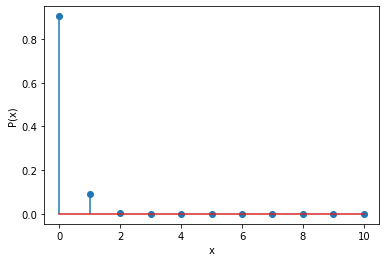

In [3]:
##
# DEMO: BINOMINAL DISTRIBUTION COMPUTATION
#
import scipy
from scipy.stats import binom

n = 10 # number of disks in a package 
p = 0.01 # probability of a disk being defective

probability_array = []

for x in range(n+1):
    probability = binom.pmf(x,n,p)
    probability_array.append(probability)

result = 1 - probability_array[0]
print(result)

x = range(n + 1)
plt.stem(x,probability_array)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()


## 3. Expectation, Variance and Covariance
### a) Expectation (expected value)
1. Considering a random variable $\mathbf{X}$ taking in possible values $x \in \{x_1, x_2,...,x_n\}$, we know that the probability of all possible values for this random variable can be described by a probability function $p_X(x)$ (or $f_{\mathbf{X}}(x)$ if this random variable is continuous). Thus, the expected value (or expectation) is the mean value that $X$ takes on when its possible values $\mathbf{x}$ are drawn from the distribution $p_X(x)$.


2. To simply put, we can understand that an expected value is the theoretical mean value of a random phenomenon/event/random variable after occurring many times if we want to understand expected value according to frequentism philosophy. In other words, the expected value is a measure of central tendency: a value for which the results will tend after repeating the same phenomenon/event/random variable many times.


3. Depending on the type of a random variable being whether discrete or continuous, we have two different methods to compute the expected value:
    * For discrete variables, the expected value is a weighted average.
$$
E[\mathbf{X}] = \sum_i x_i p_\mathbf{X}(\mathbf{X} = x_i) = p_{\mathbf{X}}(\mathbf{X} = x_1)x_1 + p_{\mathbf{X}}(\mathbf{X} = x_2)x_2 + ... + p_{\mathbf{X}}(\mathbf{X} = x_n)x_n
$$

    * For continuous variables, the expected value is the integral of the curve density function $f_{\mathbf{X}}(x)$ for the interval of possible values. Technically speaking, we usually evaluate from $-\infty$ to $\infty$. 
$$
E[\mathbf{X}] = \int_{-\infty}^{\infty} xf_{\mathbf{X}}(x)dx
$$


3. As an example, considering the value we get from rolling of a dice $\mathbf{X}$, we know that all possible values are **1**, **2**, **3**, **4**, **5** and **6**. Each possible value has a chance of $\frac{1}{6}$ of taking place. Thus, the expected value is:
$$
E[\mathbf{X}] =\frac{1}{6}\times1 + \frac{1}{6}\times2  + \frac{1}{6}\times3 + \frac{1}{6}\times4 + \frac{1}{6}\times5 + \frac{1}{6}\times6 = 3.5
$$


4. Another fun example is computing the expected value of a lottery (in this case, the Eurojackpot) to determine whether it worths buying. The Eurojackpot is a transnational European lottery where the prize starts at 10,000,000€ and can roll over up to 90,000,000€. Playing the Eurojackpot costs 2€ per line. Considering the pot of 47,000,000€, we can compute the expected value of this pot by multiplying the odds of winning for each prize, and sum all products. The resulting expected value is 9.84€ meaning if we play this pot, we are expected to win 9.84 - 2 = 7.84€ on average. Therefore, it is worth buying.

<div>
    <img src = "images/eurojackpot.png" width = 100%/>
    </div>
    
Figure 2: An example of computing the expected value of a pot in the Eurojackpot lottery. Noted that the odds mentioned here is based on the information provided by Veikkaus (the Finnish National Betting Agency), and is applicable before 10.10.2014. Since 10.10.2014, the odds have been adjusted to decrease the chance of winning. Noted that we does not take into account the case of prize sharing if multiple tickets won.

5. Expectations are linear. For example, consider two random variables $\mathbf{X}$ and $\mathbf{Y}$:
$$
E[\alpha X + \beta Y] = \alpha E[X] + \beta E[Y]
$$


6. Noted that because the expectation is also the mean of an event or a random variable $X$, sometimes we denote the former as $\mu_X$.


7. Suppose we have many random variables $[X_1, X_2, X_3,..., X_n]$, the expectation now becomes a multivariate value, and is represented in its vector form:
$$
E[\mathbb{X}] = [E[\mathbf{X_1}], E[\mathbf{X_2}],..., E[\mathbf{X_n}]]
$$


### b) Variance
1. Considering a random variable $\mathbf{X}$ taking possible values $x \in \{x_1,x_2,...,x_n\}$ that are drawn from a probability distribution $p_{\mathbf{X}}(x)$, the variance gives us a measure of how much the values of our random variable vary as we sample different values of $X$ from $p_{\mathbf{X}}(x)$:
$$
\text{Var}(\mathbf{X}) = E[(\mathbf{X} - E[\mathbf{X}])^2]
$$


2. An alternative formula for $\text{Var}(\mathbf{X})$ is expressed as follows:
$$
\text{Var}(\mathbf{X}) = E[\mathbf{X}^2] - (E[\mathbf{X}])^2
$$


3. Using the definition of expected value above, we can interpret the variance for discrete random variable and continuous random variable as follows:
    * Discrete $\mathbf{X}$: $\text{Var}(\mathbf{X}) = \sum x^2P(\mathbf{X}) - E^2(\mathbf{X})$   
    * Continuous $X$: $\text{Var}(\mathbf{X}) = \int_{-\infty}^{\infty} x^2f(x)dx - (\int_{-\infty}^{\infty} xf(x)dx)^2$


4. As an example, considering the rolling of a die, we compute its variance to be 2.92.
<div>
    <img src = "images/variance.png" width = 50%/>
    </div>

Figure 3: An example of computing a variance for rolling dice.


5. The variance has the following interesting property:
$$
\text{Var}(\alpha\mathbf{X} + b) = \alpha^2\text{Var}(\mathbf{X})
$$


### c) Covariance
1. Considering two random variables $\mathbf{X}$ and $\mathbf{Y}$ taking possible values $x \in \{x_1,x_2,...,x_n\}$ and $y \in \{y_1,y_2,...,y_n\}$ drawing from two probability distributions $p_{\mathbf{X}}(x)$ and $p_{\mathbf{Y}}(y)$, respectively. The covariance between $p_{\mathbf{X}}$ and $p_{\mathbf{Y}}$ gives us some sense of how much two values are linearly related to each other, as well as the scale of these variables:
$$
\text{Cov}[\mathbf{X}, \mathbf{Y}] = E[(\mathbf{X} - E[\mathbf{X}]),(\mathbf{Y} - E[\mathbf{Y}])]
$$

2. We can also express the covariance with the following alternative formula:
$$
\text{Cov}[\mathbf{X},\mathbf{Y}] = E[\mathbf{X}\mathbf{Y}] -E[\mathbf{X}]E[\mathbf{Y}].
$$

3. The covariance has the following interesting properties:
    * The covariance is commutative $\text{Cov}(\mathbf{X},\mathbf{Y}) = \text{Cov}(\mathbf{Y},\mathbf{X})$.
    * The covariance is distributive $\text{Cov}(\mathbf{X_1} + \mathbf{X_2}, Y) = \text{Cov}(\mathbf{X_1},Y) + \text{Cov}(\mathbf{X_2},Y)$.
    * The covariance of the same random variable is the variance: $\text{Cov}(X,X) = \text{Var}(X)$.
    * Additionally, $\text{Cov}(\alpha \mathbf{X},\mathbf{Y}) = \alpha \text{Cov}(\mathbf{X},\mathbf{Y})$.
    
    
4. High absolute values of the covariance mean that the values change very much and are both far from their respective means (expectations) at the same time. If the sign of the covariance is positive, then both variables tend to take on relatively high values simultaneously. If the sign of the covariance is negative, then one variable tends to take on a relatively high value at the times that the other takes on a relatively low value and vice versa.


5. The normalized version of covariance is called the correlation
$$
\text{corr}(\mathbf{X},\mathbf{Y}) = \frac{\text{Cov}(\mathbf{X},\mathbf{Y})}{\sqrt{\text{Var}(\mathbf{X})\text{Var}(\mathbf{Y})}}
$$
<div>
    <img src="images/covariance.png" width = 50%/>
    </div>

Figure 4: Visualization of correlation between $X$ and $Y$: $X$ and $Y$ are negatively correlated (a); $X$ and $Y$ are positively correlated.


5. Let's consider a simple case of covariance: suppose we have a random variable $\mathbf{X}$ with many possible states $x \in \{x_1,x_2,...,x_n\}$ the covariance now becomes a multivariate value and is represented in its matrix form:
$$
\text{Cov}(\mathbf{X},\mathbf{X}) = \begin{bmatrix} \text{Cov}(x_1,x_1) & \text{Cov}(x_1,x_2) & ... & \text{Cov}(x_1,x_n) \\ \text{Cov}(x_2,x_1) & \text{Cov}(x_2,x_2) & ... & \text{Cov}(x_2,x_n) \\ ... & ... & ... & ... \\ \text{Cov}(x_n,x_1) & \text{Cov}(x_n,x_2) & ... & \text{Cov}(x_n,x_n) \end{bmatrix}
$$

Based on the same principal, we can derive the covariance matrix for 

### d) Statistical independence
1. Considering two random variables $\mathbf{X}$ and $\mathbf{Y}$, they are statistically independent if and only if the following condition is fulfilled:
$$
P(\mathbf{X},\mathbf{Y}) = P(\mathbf{X})P(\mathbf{Y})
$$
In other words, two random variables $\mathbf{X}$ and $\mathbf{Y}$ are independent if the value of $\mathbf{X}$ does not add any additional information about $\mathbf{Y}$, and vice versa. 


2. If $\mathbf{X}$ and $\mathbf{Y}$ are (statistically) independent, then:
$$
P(\mathbf{X}|\mathbf{Y}) = P(\mathbf{X})
$$

$$
P(\mathbf{Y}|\mathbf{X}) = P(\mathbf{Y})
$$

$$
\text{Var}(\mathbf{X} + \mathbf{Y}) = \text{Var}(\mathbf{X}) + \text{Var}(\mathbf{Y})
$$

$$
\text{Cov}(\mathbf{X},\mathbf{Y}) = 0
$$


3. Noted that two random variables can have covariance zero but are not statistically independent. To understand why to recall that covariance measures only linear dependence. Therefore, random variables that are nonlinearly dependent could have covariance zero.

# Appendix <a name = "Section6"></a>

## 1. Revisiting the product rule
1. Considering a joint probability $P(\mathbf{X})$ consisting of many smaller probabilities $[p(x_1),p(x_2),...]$, we can generalize the product rule as:
$$
P(\mathbf{X}) = P(x_1,x_2,...,x_n) = P(x_1)\prod_{i = 2}^n P(x_i|x_1,...,x_n) 
$$


2. The reasons why we include the conditional probabilities $P(x_2|x_1,x_2,...,x_n)$, $P(x_3|x_1,x_2,...,x_n)$,... because we do not assume that all marginal events $x_1,x_2,...$ are indepedent. If they are, the product rule can be rewritten as:
$$
P(\mathbf{X}) = \prod_{i = 1}P(x_i)
$$
The result is the same expression we mention above.

# Suggestive Readings <a name = "Section7"></a>
1. **How Not to Be Wrong: The Power of Mathematical Thinking** by Prof. Jordan Ellenberg from the University of Wisconsin–Madison. This book is about how mathematical thinking (mainly Statistics and Probability) can help us make better decision. The book is available in many languages including Vietnamese.


2. _3Blue1Brown_ - a famous Youtube channel about math animation, released a couple of interesting videos about Bayesian probability:
    * [Bayes' theorem](https://www.youtube.com/watch?v=HZGCoVF3YvM&t=257s)
    * [Why Bayes' rule is nicer with odds](https://www.youtube.com/watch?v=lG4VkPoG3ko)
    * [The quick proof of Bayes' theorem](https://www.youtube.com/watch?v=U_85TaXbeIo)